In [42]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize': (9, 6)})

In [44]:
data = pd.read_csv('car.csv')

In [45]:
data.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [46]:
X = data.drop(['Car_Acceptability'], axis=1)
y = data[['Car_Acceptability']]

In [47]:
X = pd.get_dummies(X)

In [48]:
X

,Buying_Price_high,Buying_Price_low,Buying_Price_med,Buying_Price_vhigh,Maintenance_Price_high,Maintenance_Price_low,Maintenance_Price_med,Maintenance_Price_vhigh,No_of_Doors_2,No_of_Doors_3,...,No_of_Doors_5more,Person_Capacity_2,Person_Capacity_4,Person_Capacity_more,Size_of_Luggage_big,Size_of_Luggage_med,Size_of_Luggage_small,Safety_high,Safety_low,Safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=np.random.seed(0))

In [50]:
parameters = {'criterion' : ['entropy'], 'max_depth' : range(2, 20, 3), 'min_samples_split' : range(2, 50, 5), 'min_samples_leaf' : range(2, 50, 2)}

In [51]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1, verbose=1)

In [52]:
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(2, 50, 2),
                         'min_samples_split': range(2, 50, 5)},
             verbose=1)

In [53]:
grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [54]:
best_clf = grid_search_cv.best_estimator_

In [55]:
import graphviz

In [56]:
columns=list(X_train.columns)
dot_data = tree.export_graphviz(best_clf,out_file=None,feature_names=columns,class_names=True, filled=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)

'image.pdf'

In [57]:
y_pred = best_clf.predict(X_test)

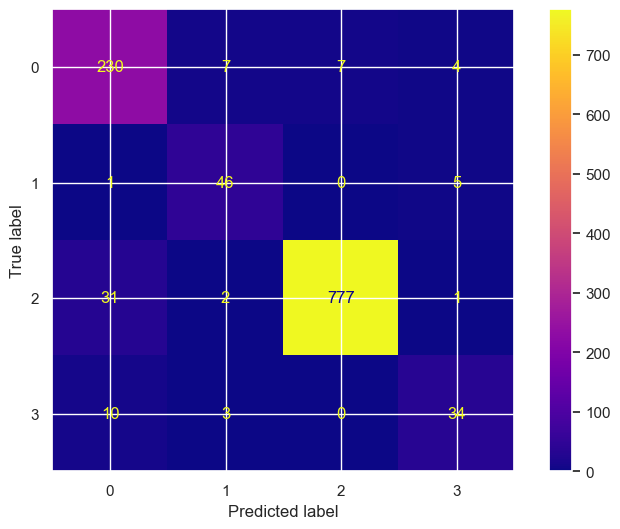

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='plasma')